In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('energy_carbon_emission_dataset.csv')

In [4]:
print(data.isnull().sum())

Energy Produced (kWh)      0
Carbon Emitted (kg CO2)    0
dtype: int64


In [7]:
data.head()

,Energy Produced (kWh),Carbon Emitted (kg CO2)
0,1024.835708,890.582230
1,993.086785,862.992416
2,1032.384427,897.142067
3,1076.151493,935.175647
4,988.292331,858.826036


In [8]:
X = data[['Energy Produced (kWh)']] 
y = data['Carbon Emitted (kg CO2)']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.8956222371006883e-26
R-squared: 1.0


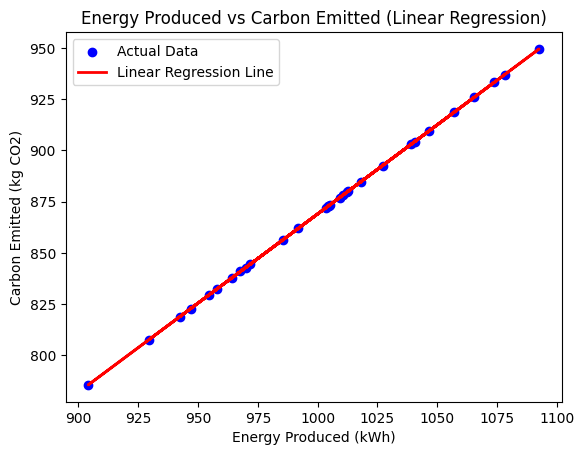

In [17]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Energy Produced vs Carbon Emitted (Linear Regression)')
plt.xlabel('Energy Produced (kWh)')
plt.ylabel('Carbon Emitted (kg CO2)')
plt.legend()
plt.show()

In [18]:
emission_rate = model.coef_[0]
print(f"Estimated Emission Rate (kg CO2/kWh): {emission_rate}")

Estimated Emission Rate (kg CO2/kWh): 0.8689999999999999


In [19]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [21]:
import joblib

In [22]:
joblib.dump(model, 'linear_regression_model.pkl')
print("Model saved to 'linear_regression_model.pkl' successfully!")

Model saved to 'linear_regression_model.pkl' successfully!


In [23]:
# Load the saved model
loaded_model = joblib.load('linear_regression_model.pkl')

# Use the loaded model to make predictions
new_prediction = loaded_model.predict([[1]])  # Example: predict for 100 kWh
print(f"Predicted Carbon Emission: {new_prediction[0]} kg CO2")


Predicted Carbon Emission: 0.8689999999999999 kg CO2


/home/awesomebaba/Desktop/python/env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
